# Aim 
I collected data from vna and analyzed it intyo 2 files (datas and outputs in Google drive folder)

I want to look at the data again, analyze the Qs

## Imports 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 

# Utilities 

In [3]:
def read_json(filepath):
    import json
    with open(filepath, 'r') as f:
        return json.load(f)
    

In [4]:
def print_output(output, return_output_reformatted = True):
    '''# [[Q, Qc, freq, phase], [Q_err, Qi_err, Qc_err, Qc_real_err, Phs Err, f_err ], something, something else]
    if return_output_reformatted:
       will return 2 strings, one for fitted parameters, one for errors
       [Q, Qi, Qc, freq], [Q_err, Qi_err, Qc_err, f_err]
    '''
    Q, Qc, freq, phase = output[0]
    Q_err, Qi_err, Qc_err, Qc_real_err, Phs_Err, f_err = output[1]
    print(f"Fitted parameters:")
    print(f"Q: {Q/1e6:.3f}M ± {Q_err/1e6:.3f}M")
    print(f"Qi: {1/(1/Q - 1/Qc)/1e6:.3f}M ± {Qi_err/1e6:.3f}M")
    print(f"Qc: {Qc/1e6:.3f}M ± {Qc_err/1e6:.3f}M")
    print(f"Qc_real: {(Qc * np.cos(phase))/1e6:.3f}M ± {Qc_real_err/1e6:.3f}M")
    print(f"Frequency: {freq/1e9:.6f} GHz ± {f_err/1e6:.3f} MHz")
    print(f"Phase: {phase*180/np.pi:.2f}° ± {Phs_Err*180/np.pi:.2f}°")
    if return_output_reformatted:
        return [Q, 1/(1/Q - 1/Qc), Qc, freq], [Q_err, Qi_err, Qc_err, f_err]

In [5]:
# find the analysis jsons and read them 
base_folder = '/Users/eesh/Library/CloudStorage/GoogleDrive-eesh@stanford.edu/Shared drives/SLab/Multimode/LinearMultimode/measurements/vna_meas_250910/analysis_data'
datas_file_path = os.path.join(base_folder, '250918_fine_sweepall_datas.json')
outputs_file_path = os.path.join(base_folder, '250914_fine_sweepall_outputs.json')
datas = read_json(datas_file_path)
outputs = read_json(outputs_file_path)
                              


In [27]:
import numpy as np

h = 6.62607015e-34  # Planck constant (J*s)

def intracavity_photon_number(Qc, Q, Pin_dBm, f_Hz):
    """
    Compute steady-state intracavity photon number <n>.

    Parameters
    ----------
    Qc : float
        Coupling quality factor.
    Q : float
        Loaded (total) quality factor.
    Pin_dBm : float
        Input power in dBm.
    f_Hz : float
        Resonator frequency in Hz.

    Returns
    -------
    n : float
        Average intracavity photon number.
    """
    Pin_W = 1e-3 * 10**(Pin_dBm/10)     # convert dBm to Watts
    omega = 2 * np.pi * f_Hz
    n = (4 * Q**2 / Qc) * (Pin_W / (h * omega**2))
    return n


In [35]:
intracavity_photon_number(1e6, 1e7, -200,   5e9)  # Example usage

0.00611651741370941

# Redoing cavity fits 

In [6]:
len(datas)

24

In [7]:
idx = 11
datas[idx]['data']['amps'] = np.array(datas[idx]['data']['amps'])
datas[idx]['data']['phases'] = np.array(datas[idx]['data']['phases'])
datas[idx]['data']['freqs'] = np.array(datas[idx]['data']['freqs'])

/Users/eesh/Documents/scresonators/fitting/ana_resonator.py:430: SyntaxWarning: invalid escape sequence '\d'
  f"res_{resonator:d}_" + "(-?\d{1,5})" + pattern_end + ends[0]
/Users/eesh/Documents/scresonators/fitting/ana_resonator.py:433: SyntaxWarning: invalid escape sequence '\d'
  pattern = f"res_{resonator:d}_" + "(-?\d{1,3})dbm_wide"
/Users/eesh/Documents/scresonators/fitting/ana_resonator.py:436: SyntaxWarning: invalid escape sequence '\d'
  f"res_{resonator:d}_" + "(-?\d{1,5})" + pattern_end + ends[0]
/Users/eesh/Documents/scresonators/fitting/ana_resonator.py:961: SyntaxWarning: invalid escape sequence '\D'
  ax2[0].set_ylabel("$\Delta f/f$ (ppm)")
/Users/eesh/Documents/scresonators/fitting/ana_resonator.py:1050: SyntaxWarning: invalid escape sequence '\D'
  ax2[0].set_ylabel("$\Delta f/f$ (ppm)")
/Users/eesh/Documents/scresonators/fitting/ana_resonator.py:1135: SyntaxWarning: invalid escape sequence '\D'
  ax[1].set_ylabel("$\Delta f/f_0$")
/Users/eesh/Documents/scresonators/fi

>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Fitted parameters:
Q: 39.510M ± infM
Qi: 48.029M ± infM
Qc: 222.743M ± infM
Qc_real: 222.650M ± infM
Frequency: 5.622688 GHz ± 0.000 MHz
Phase: -1.66° ± 0.31°


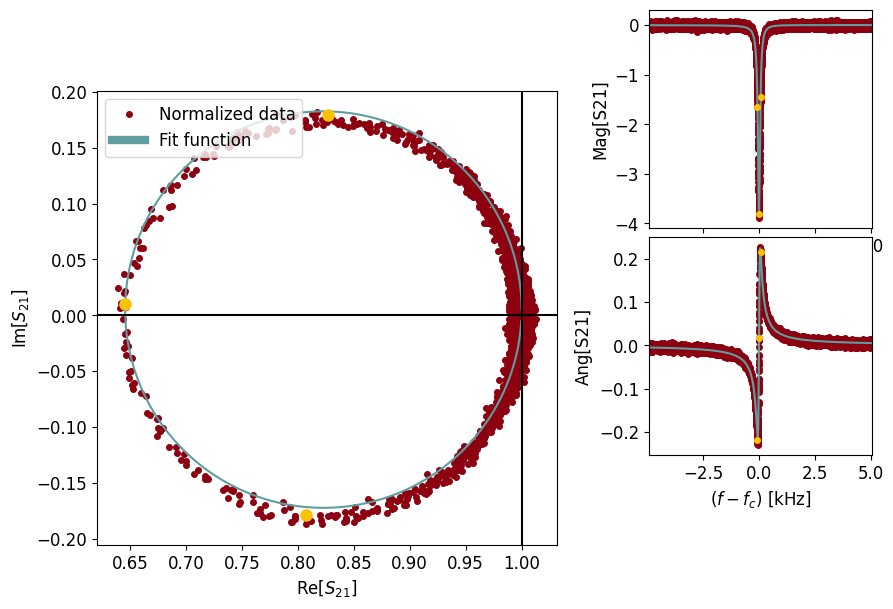

In [8]:
from scresonators.fit_resonator.ana_resonator import ResonatorFitter
output = ResonatorFitter.fit_resonator(datas[idx]['data'], 'Test',os.getcwd(), fit_type='DCM REFLECTION', plot=True)
# output contains 
# [[Q, Qc, freq, phase], [Q_err, Qi_err, Qc_err, Qc_real_err, Phs Err, f_err ], something, something else]
[Q, Qi, Qc, freq], [Q_err, Qi_err, Qc_err, f_err] = print_output(output)

# Sweep over all the datas

In [9]:
datas[0]['span']

3000.0

In [10]:
import pandas as pd

# make a datset with the folloqing columns 
# freq (GHz), power, Q (M), Q_err (M), Qi (Million), Qi_err (M), Qc (Million), Qc_err (M)
dataset = pd.DataFrame(columns=[
    "freq (GHz)", "power", "span", "Q (M)", "Q_err (M)", "Qi (M)", "Qi_err (M)", "Qc (M)", "Qc_err (M)",
])


In [11]:
# ignore anything with power other than -30 dbm
# use updated column names "freq (GHz)", "power", "span", "Q (M)", "Q_err (M)", "Qi (M)", "Qi_err (M)", "Qc (M)", "Q
for data in datas:
    data['data']['amps'] = np.array(data['data']['amps'])
    data['data']['phases'] = np.array(data['data']['phases'])
    data['data']['freqs'] = np.array(data['data']['freqs'])
    if data['power'] != -30:
        continue

    output = ResonatorFitter.fit_resonator(data['data'], 'Test', os.getcwd(), fit_type='DCM REFLECTION', plot=False)
    [Q, Qi, Qc, freq], [Q_err, Qi_err, Qc_err, f_err] = print_output(output, return_output_reformatted=True)
    power = data['power']
    dataset = pd.concat([dataset, pd.DataFrame({
        "freq (GHz)": [freq / 1e9],
        "power": [power],
        "span": [data['span']],
        "Q (M)": [Q / 1e6],
        "Q_err (M)": [Q_err / 1e6],
        "Qi (M)": [Qi / 1e6],
        "Qi_err (M)": [Qi_err / 1e6],
        "Qc (M)": [Qc / 1e6],
        "Qc_err (M)": [Qc_err / 1e6]
    })], ignore_index=True)

/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


Fitted parameters:
Q: 23.670M ± 0.030M
Qi: 73.353M ± 0.407M
Qc: 34.947M ± 0.041M
Qc_real: 34.784M ± 0.041M
Frequency: 3.806576 GHz ± 0.000 MHz
Phase: -5.54° ± 0.06°


/var/folders/qv/2zlrl3v97s9_ht7wrdl_fgp00000gn/T/ipykernel_2360/2423592286.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataset = pd.concat([dataset, pd.DataFrame({


Fitted parameters:
Q: 23.679M ± 0.049M
Qi: 73.362M ± 0.692M
Qc: 34.965M ± 0.066M
Qc_real: 34.799M ± 0.066M
Frequency: 3.806576 GHz ± 0.000 MHz
Phase: -5.59° ± 0.10°


/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=11052014.928645765) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=11064151.889353724) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=10224031.708037023) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=10233226.90592637) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=4808269692.479359) = 0.0 < max(sigmas)
  warn(errmsg)
/opt

Fitted parameters:
Q: 11.058M ± infM
Qi: -136.366M ± infM
Qc: 10.229M ± infM
Qc_real: 10.224M ± infM
Frequency: 4.808270 GHz ± 0.000 MHz
Phase: 1.69° ± 0.02°
Fitted parameters:
Q: 11.077M ± 0.008M
Qi: -141.087M ± 2.547M
Qc: 10.270M ± 0.006M
Qc_real: 10.264M ± 0.006M
Frequency: 4.808270 GHz ± 0.000 MHz
Phase: 2.00° ± 0.04°


/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=16346168.550706457) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=20287685.805473115) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=4976206953.93256) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=0.03687506509268131) = 0.0 < max(sigmas)
  warn(errmsg)


Fitted parameters:
Q: 16.356M ± infM
Qi: 84.239M ± 104.322M
Qc: 20.296M ± 0.016M
Qc_real: 20.282M ± 0.016M
Frequency: 4.976207 GHz ± 0.000 MHz
Phase: 2.14° ± 0.03°
Fitted parameters:
Q: 16.350M ± 0.025M
Qi: 83.471M ± 1.110M
Qc: 20.333M ± 0.028M
Qc_real: 20.321M ± 0.028M
Frequency: 4.976207 GHz ± 0.000 MHz
Phase: 1.94° ± 0.08°
Fitted parameters:
Q: 20.919M ± 0.023M
Qi: 183.706M ± 2.779M
Qc: 23.607M ± 0.023M
Qc_real: 23.506M ± 0.023M
Frequency: 5.138250 GHz ± 0.000 MHz
Phase: 5.30° ± 0.06°
Fitted parameters:
Q: 20.903M ± 0.040M
Qi: 183.010M ± 5.055M
Qc: 23.599M ± 0.040M
Qc_real: 23.503M ± 0.041M
Frequency: 5.138250 GHz ± 0.000 MHz
Phase: 5.18° ± 0.10°


/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=37437714.159126356) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=37802285.68745609) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=172278128.2496859) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=172818776.74940142) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=5300958005.910248) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/

Fitted parameters:
Q: 37.620M ± infM
Qi: 48.109M ± infM
Qc: 172.548M ± infM
Qc_real: 171.409M ± infM
Frequency: 5.300958 GHz ± inf MHz
Phase: -6.59° ± 180.00°


/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=172144602.7712577) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=173049832.8180459) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=-0.10720078721293323) = 0.0 < max(sigmas)
  warn(errmsg)


Fitted parameters:
Q: 37.470M ± 0.265M
Qi: 47.860M ± 10.568M
Qc: 172.597M ± infM
Qc_real: 171.477M ± infM
Frequency: 5.300958 GHz ± 0.000 MHz
Phase: -6.53° ± 0.16°


/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=39371082.63952392) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=39833567.04904722) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=223057634.5088261) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=223897544.801443) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=5622688236.580206) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/ana

Fitted parameters:
Q: 39.602M ± infM
Qi: 48.132M ± infM
Qc: 223.478M ± infM
Qc_real: 223.466M ± infM
Frequency: 5.622688 GHz ± 0.000 MHz
Phase: -0.59° ± 0.18°


/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=38967616.31741497) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=40051800.0200948) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=221804407.835547) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=223681333.43330613) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=5622688237.239016) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/ana

Fitted parameters:
Q: 39.510M ± infM
Qi: 48.029M ± infM
Qc: 222.743M ± infM
Qc_real: 222.650M ± infM
Frequency: 5.622688 GHz ± 0.000 MHz
Phase: -1.66° ± 0.31°
Fitted parameters:
Q: 29.254M ± 0.055M
Qi: 44.717M ± 0.161M
Qc: 84.602M ± 0.142M
Qc_real: 82.703M ± 0.145M
Frequency: 5.786405 GHz ± 0.000 MHz
Phase: 12.16° ± 0.10°
Fitted parameters:
Q: 29.278M ± 0.098M
Qi: 44.835M ± 0.288M
Qc: 84.376M ± 0.254M
Qc_real: 82.494M ± 0.260M
Frequency: 5.786405 GHz ± 0.000 MHz
Phase: 12.12° ± 0.17°


/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=27995477.25219869) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=28361282.26389721) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=69782186.71125114) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=70214473.2254178) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=5969312240.654924) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/ana

Fitted parameters:
Q: 28.178M ± infM
Qi: 47.165M ± infM
Qc: 69.998M ± infM
Qc_real: 69.493M ± infM
Frequency: 5.969312 GHz ± inf MHz
Phase: 6.89° ± 180.00°
Fitted parameters:
Q: 29.116M ± 0.105M
Qi: 49.835M ± 0.414M
Qc: 70.033M ± 0.235M
Qc_real: 69.541M ± 0.236M
Frequency: 5.969312 GHz ± 0.000 MHz
Phase: 6.80° ± 0.19°


/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=49707135.64484065) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=49780925.1839172) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=6130556458.41533) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=-0.07401682353678662) = 0.0 < max(sigmas)
  warn(errmsg)


Fitted parameters:
Q: 25.011M ± 0.046M
Qi: 50.305M ± 25.190M
Qc: 49.744M ± infM
Qc_real: 49.604M ± infM
Frequency: 6.130556 GHz ± 0.000 MHz
Phase: -4.31° ± 0.04°
Fitted parameters:
Q: 25.057M ± 0.074M
Qi: 50.384M ± 0.413M
Qc: 49.845M ± 0.143M
Qc_real: 49.710M ± 0.143M
Frequency: 6.130556 GHz ± 0.000 MHz
Phase: -4.22° ± 0.16°


/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=19069377.19882104) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=30317233.19341794) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=6317752483.108949) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=-0.34116434936844076) = 0.0 < max(sigmas)
  warn(errmsg)


Fitted parameters:
Q: 19.055M ± infM
Qi: 51.338M ± 78.889M
Qc: 30.302M ± 0.028M
Qc_real: 28.549M ± 0.029M
Frequency: 6.317752 GHz ± 0.000 MHz
Phase: -19.58° ± 0.04°
Fitted parameters:
Q: 19.062M ± 0.040M
Qi: 51.419M ± 0.347M
Qc: 30.291M ± 0.057M
Qc_real: 28.544M ± 0.061M
Frequency: 6.317752 GHz ± 0.000 MHz
Phase: -19.55° ± 0.11°


/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=30493620.330546204) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=30758205.670435924) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=116263306.04972397) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=116653850.21680011) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=6512205951.331891) = 0.0 < max(sigmas)
  warn(errmsg)
/op

Fitted parameters:
Q: 30.626M ± infM
Qi: 41.554M ± infM
Qc: 116.459M ± infM
Qc_real: 114.642M ± infM
Frequency: 6.512206 GHz ± inf MHz
Phase: -10.13° ± 180.00°
Fitted parameters:
Q: 30.060M ± 0.127M
Qi: 40.616M ± 0.273M
Qc: 115.658M ± 0.466M
Qc_real: 114.380M ± 0.471M
Frequency: 6.512206 GHz ± 0.000 MHz
Phase: -8.53° ± 0.22°


/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=27725147.72107547) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=69260513.40450506) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=6708674064.993146) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=0.07452191584438406) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=0.07705499946547731) = 0.0 < max(sigmas)
  warn(errmsg)


Fitted parameters:
Q: 27.768M ± infM
Qi: 46.329M ± 115.778M
Qc: 69.310M ± 0.028M
Qc_real: 69.111M ± 0.028M
Frequency: 6.708674 GHz ± 0.000 MHz
Phase: 4.34° ± 180.00°


/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=27655525.628246464) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=69196264.98389687) = 0.0 < max(sigmas)
  warn(errmsg)


Fitted parameters:
Q: 27.729M ± infM
Qi: 46.234M ± 115.721M
Qc: 69.280M ± 0.106M
Qc_real: 69.101M ± 0.106M
Frequency: 6.708674 GHz ± 0.000 MHz
Phase: 4.13° ± 180.00°


/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=6708674065.626465) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=0.06987886139347671) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/envs/quantum/lib/python3.12/site-packages/lmfit/confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=0.0742230827308811) = 0.0 < max(sigmas)
  warn(errmsg)


In [12]:
dataset

,freq (GHz),power,span,Q (M),Q_err (M),Qi (M),Qi_err (M),Qc (M),Qc_err (M)
0,3.806576,-30,3000.0,23.670058,0.030491,73.352627,0.407322,34.947085,0.040875
1,3.806576,-30,10000.0,23.679436,0.049382,73.361719,0.692289,34.965465,0.065822
2,4.808270,-30,3000.0,11.058083,inf,-136.365636,inf,10.228629,inf
3,4.808270,-30,10000.0,11.076658,0.007656,-141.087107,2.547297,10.270341,0.006463
4,4.976207,-30,3000.0,16.355510,inf,84.238697,104.322165,20.296142,0.016446
5,4.976207,-30,10000.0,16.350112,0.025221,83.471313,1.110465,20.332850,0.028174
6,5.138250,-30,3000.0,20.919225,0.022760,183.705844,2.778657,23.607492,0.023199
7,5.138250,-30,10000.0,20.903357,0.039720,183.010200,5.054743,23.598803,0.040491
8,5.300958,-30,3000.0,37.620000,inf,48.108999,inf,172.548452,inf
9,5.300958,-30,10000.0,37.469704,0.265382,47.859733,10.567516,172.597218,inf


In [13]:
# Make a helper column with frequency rounded to 4 decimals
dataset["freq_rounded"] = dataset["freq (GHz)"].round(4)

# Drop inf errors
filtered = dataset[
    (~np.isinf(dataset["Qi_err (M)"])) &
    (~np.isinf(dataset["Qc_err (M)"])) &
    (~np.isinf(dataset["Q_err (M)"]))
]

# For each rounded frequency, keep the row with lowest Qi_err
filtered = (
    filtered.loc[
        filtered.groupby("freq_rounded")["Qi_err (M)"].idxmin()
    ]
    .reset_index(drop=True)
    .drop(columns=["freq_rounded"])  # optional: drop helper col
)


In [14]:
cooldown_dataset09 = filtered

In [15]:
cooldown_dataset09

,freq (GHz),power,span,Q (M),Q_err (M),Qi (M),Qi_err (M),Qc (M),Qc_err (M)
0,3.806576,-30,3000.0,23.670058,0.030491,73.352627,0.407322,34.947085,0.040875
1,4.808270,-30,10000.0,11.076658,0.007656,-141.087107,2.547297,10.270341,0.006463
2,4.976207,-30,10000.0,16.350112,0.025221,83.471313,1.110465,20.332850,0.028174
3,5.138250,-30,3000.0,20.919225,0.022760,183.705844,2.778657,23.607492,0.023199
4,5.786405,-30,3000.0,29.254423,0.054580,44.717097,0.160956,84.601984,0.141749
5,5.969312,-30,10000.0,29.116099,0.104641,49.835000,0.414041,70.032713,0.234732
6,6.130556,-30,10000.0,25.056676,0.073820,50.384241,0.413066,49.845360,0.142692
7,6.317752,-30,10000.0,19.061618,0.040485,51.418863,0.346653,30.290797,0.057350
8,6.512206,-30,10000.0,30.060031,0.127400,40.616375,0.272747,115.658368,0.465692


In [16]:
# compute delta f (from the next higher mode - current mode)
# Compute delta f for each mode: (next higher mode freq - current mode freq)
freqs = filtered["freq (GHz)"].values
delta_f = np.empty_like(freqs)
delta_f[:-1] = freqs[1:] - freqs[:-1]
delta_f[-1] = np.nan  # last mode has no next mode

filtered["delta_f (GHz)"] = delta_f
filtered

,freq (GHz),power,span,Q (M),Q_err (M),Qi (M),Qi_err (M),Qc (M),Qc_err (M),delta_f (GHz)
0,3.806576,-30,3000.0,23.670058,0.030491,73.352627,0.407322,34.947085,0.040875,1.001694
1,4.808270,-30,10000.0,11.076658,0.007656,-141.087107,2.547297,10.270341,0.006463,0.167937
2,4.976207,-30,10000.0,16.350112,0.025221,83.471313,1.110465,20.332850,0.028174,0.162043
3,5.138250,-30,3000.0,20.919225,0.022760,183.705844,2.778657,23.607492,0.023199,0.648155
4,5.786405,-30,3000.0,29.254423,0.054580,44.717097,0.160956,84.601984,0.141749,0.182908
5,5.969312,-30,10000.0,29.116099,0.104641,49.835000,0.414041,70.032713,0.234732,0.161244
6,6.130556,-30,10000.0,25.056676,0.073820,50.384241,0.413066,49.845360,0.142692,0.187196
7,6.317752,-30,10000.0,19.061618,0.040485,51.418863,0.346653,30.290797,0.057350,0.194453
8,6.512206,-30,10000.0,30.060031,0.127400,40.616375,0.272747,115.658368,0.465692,NaN


In [17]:
(3.8 - 4.97)/0.18

-6.5

In [18]:
4.8 - 4.96

-0.16000000000000014

In [26]:
# create a new filtered datset in which we remove freqq_rounded duplicates (choose one with highest qi)
filtered_high_qi = (
    dataset.loc[
        dataset.groupby("freq_rounded")["Qi (M)"].idxmin()
    ]
    .reset_index(drop=True)
    .drop(columns=["freq_rounded"])
)
filtered_high_qi

,freq (GHz),power,span,Q (M),Q_err (M),Qi (M),Qi_err (M),Qc (M),Qc_err (M)
0,3.806576,-30,3000.0,23.670058,0.030491,73.352627,0.407322,34.947085,0.040875
1,4.808270,-30,10000.0,11.076658,0.007656,-141.087107,2.547297,10.270341,0.006463
2,4.976207,-30,10000.0,16.350112,0.025221,83.471313,1.110465,20.332850,0.028174
3,5.138250,-30,10000.0,20.903357,0.039720,183.010200,5.054743,23.598803,0.040491
4,5.300958,-30,10000.0,37.469704,0.265382,47.859733,10.567516,172.597218,inf
5,5.622688,-30,10000.0,39.509708,inf,48.029001,inf,222.742871,inf
6,5.786405,-30,3000.0,29.254423,0.054580,44.717097,0.160956,84.601984,0.141749
7,5.969312,-30,3000.0,28.178380,inf,47.165038,inf,69.998330,inf
8,6.130556,-30,3000.0,25.011463,0.046070,50.304965,25.190041,49.744030,inf
9,6.317752,-30,3000.0,19.054901,inf,51.338131,78.888763,30.301894,0.027574


In [36]:
# add power at fridge to be -70 db 
# then combine the total power sent to convert to how many photons at sample using intracavity_photon_number(Qc, Q, Pin_dBm, f_Hz)
filtered_high_qi["total_power_dBm"] = filtered_high_qi["power"] - 70
filtered_high_qi["intracavity_photon_number"] = filtered_high_qi.apply(
    lambda row: intracavity_photon_number(
        Qc=row["Qc (M)"] * 1e6,
        Q=row["Q (M)"] * 1e6,
        Pin_dBm=row["total_power_dBm"],
        f_Hz=row["freq (GHz)"] * 1e9
    ),
    axis=1
)
filtered_high_qi

,freq (GHz),power,span,Q (M),Q_err (M),Qi (M),Qi_err (M),Qc (M),Qc_err (M),total_power_dBm,intracavity_photon_number
0,3.806576,-30,3000.0,23.670058,0.030491,73.352627,0.407322,34.947085,0.040875,-100,1.691854e+07
1,4.808270,-30,10000.0,11.076658,0.007656,-141.087107,2.547297,10.270341,0.006463,-100,7.901313e+06
2,4.976207,-30,10000.0,16.350112,0.025221,83.471313,1.110465,20.332850,0.028174,-100,8.118776e+06
3,5.138250,-30,10000.0,20.903357,0.039720,183.010200,5.054743,23.598803,0.040491,-100,1.072398e+07
4,5.300958,-30,10000.0,37.469704,0.265382,47.859733,10.567516,172.597218,inf,-100,4.426518e+06
5,5.622688,-30,10000.0,39.509708,inf,48.029001,inf,222.742871,inf,-100,3.389691e+06
6,5.786405,-30,3000.0,29.254423,0.054580,44.717097,0.160956,84.601984,0.141749,-100,4.619864e+06
7,5.969312,-30,3000.0,28.178380,inf,47.165038,inf,69.998330,inf,-100,4.867881e+06
8,6.130556,-30,3000.0,25.011463,0.046070,50.304965,25.190041,49.744030,inf,-100,5.116602e+06
9,6.317752,-30,3000.0,19.054901,inf,51.338131,78.888763,30.301894,0.027574,-100,4.590528e+06


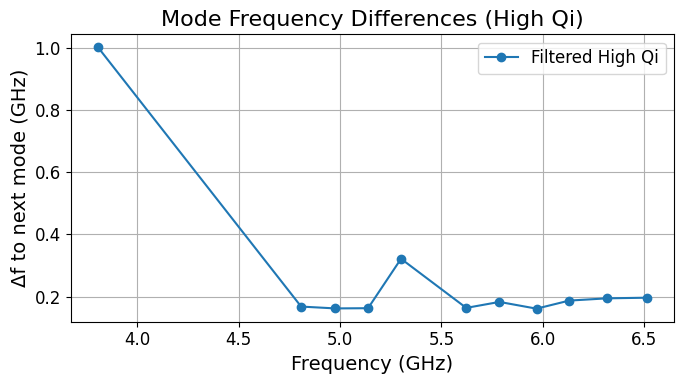

In [20]:
# plot freq diffs between all the modes 
# Compute delta f for filtered_high_qi (next higher mode freq - current mode freq)
freqs_hq = filtered_high_qi["freq (GHz)"].values
delta_f_hq = np.empty_like(freqs_hq)
delta_f_hq[:-1] = freqs_hq[1:] - freqs_hq[:-1]
delta_f_hq[-1] = np.nan  # last mode has no next mode

filtered_high_qi["delta_f (GHz)"] = delta_f_hq

plt.figure(figsize=(7, 4))
plt.plot(
    filtered_high_qi["freq (GHz)"], 
    filtered_high_qi["delta_f (GHz)"], 
    'o-', 
    label="Filtered High Qi"
)
plt.xlabel("Frequency (GHz)", fontsize=14)
plt.ylabel("Δf to next mode (GHz)", fontsize=14)
plt.title("Mode Frequency Differences (High Qi)", fontsize=16)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Previous COoldown dataset 0815

In [21]:
data = {
    "frequency (GHz)": [
        3.8195826, 4.8146879, 6.0024383, None, 5.0087568, 5.1713101, 5.3326462,
        5.6553901, 5.820517, 6.0024383, 6.1647482, 6.3503993, 6.5443892,
        6.7401663, 6.9536804
    ],
    "Q (M)": [
        0.589, 0.4184, 13.59, 5.070666667, 7.58, 8.77, 9.97, 12.88, 16.36,
        13.55, 13.72, 12.61, 14.98, 15.29, 15.36
    ],
    "Qi (M)": [
        0.617, 0.495, 14.1, None, 8.55, 10.15, 10.38, 13.4, 17.93, 17.3, 15.24,
        15.56, 16.77, 16.53, 15.7
    ],
    "Qc (M)": [
        13.2, 2.624, 279, None, 65.1, 65, 251, 334, 186.6, 61.51, 136.2, 66.5,
        140.7, 201, 596
    ]
}

df = pd.DataFrame(data)
df

# remove idx = 2 row 
df = df.drop(index=2).reset_index(drop=True)
df

,frequency (GHz),Q (M),Qi (M),Qc (M)
0,3.819583,0.589000,0.617,13.200
1,4.814688,0.418400,0.495,2.624
2,NaN,5.070667,NaN,NaN
3,5.008757,7.580000,8.550,65.100
4,5.171310,8.770000,10.150,65.000
5,5.332646,9.970000,10.380,251.000
6,5.655390,12.880000,13.400,334.000
7,5.820517,16.360000,17.930,186.600
8,6.002438,13.550000,17.300,61.510
9,6.164748,13.720000,15.240,136.200


In [22]:
cooldown_dataset08 = df

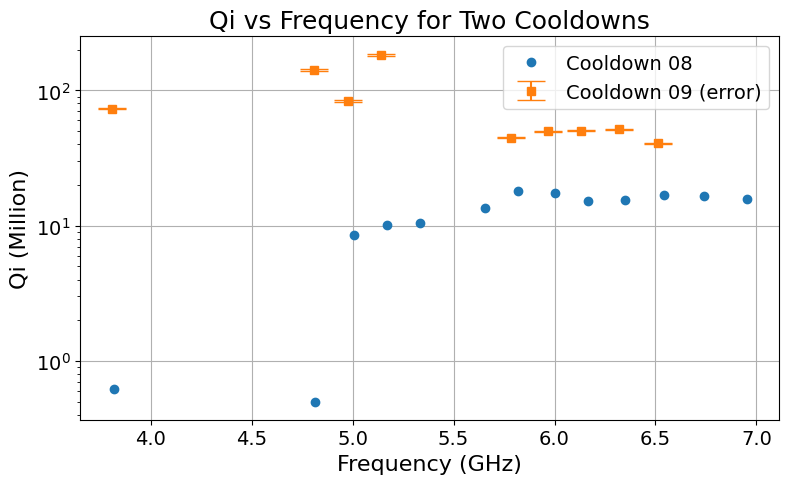

In [23]:
#plot the Qis acorss the 2 cooldowns
# the 09 datset also has error bars 
plt.figure(figsize=(8, 5))
plt.plot(
    cooldown_dataset08["frequency (GHz)"], 
    cooldown_dataset08["Qi (M)"], 
    'o', 
    label="Cooldown 08",
    markersize=6
)
plt.errorbar(
    cooldown_dataset09["freq (GHz)"],
    np.abs(cooldown_dataset09["Qi (M)"]),
    yerr=cooldown_dataset09["Qi_err (M)"],
    capsize=10,
    fmt='s',
    label="Cooldown 09 (error)",
    markersize=6
)
plt.xlabel("Frequency (GHz)", fontsize=16)
plt.ylabel("Qi (Million)", fontsize=16)
plt.yscale("log")
plt.title("Qi vs Frequency for Two Cooldowns", fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("Qi_vs_Frequency_Two_Cooldowns.pdf", dpi=300)
plt.show()


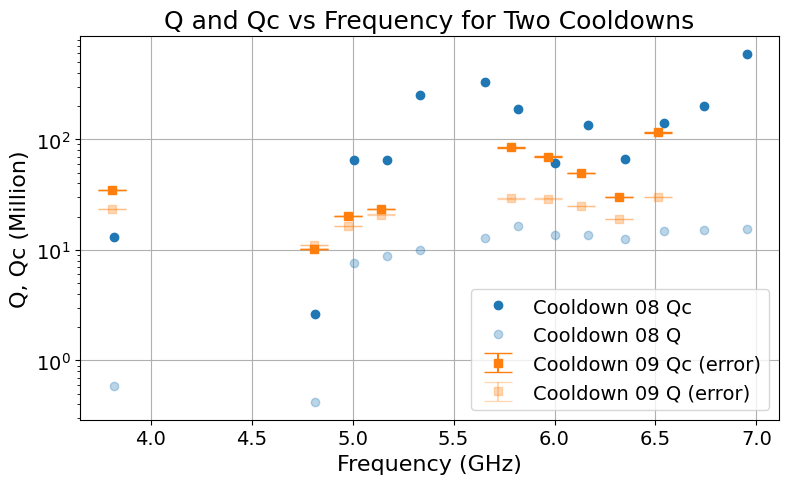

In [25]:
#plot the Qis acorss the 2 cooldowns
# the 09 datset also has error bars 
plt.figure(figsize=(8, 5))

# Plot Qc for cooldown 08
plt.plot(
    cooldown_dataset08["frequency (GHz)"], 
    cooldown_dataset08["Qc (M)"], 
    'o', 
    label="Cooldown 08 Qc",
    color='tab:blue',
    markersize=6
)
# Plot Q for cooldown 08 (faded blue)
plt.plot(
    cooldown_dataset08["frequency (GHz)"], 
    cooldown_dataset08["Q (M)"], 
    'o', 
    label="Cooldown 08 Q",
    color='tab:blue',
    alpha=0.3,
    markersize=6
)

# Plot Qc for cooldown 09
plt.errorbar(
    cooldown_dataset09["freq (GHz)"],
    np.abs(cooldown_dataset09["Qc (M)"]),
    yerr=cooldown_dataset09["Qc_err (M)"],
    capsize=10,
    fmt='s',
    label="Cooldown 09 Qc (error)",
    color='tab:orange',
    markersize=6
)
# Plot Q for cooldown 09 (faded orange)
plt.errorbar(
    cooldown_dataset09["freq (GHz)"],
    np.abs(cooldown_dataset09["Q (M)"]),
    yerr=cooldown_dataset09["Q_err (M)"],
    capsize=10,
    fmt='s',
    label="Cooldown 09 Q (error)",
    color='tab:orange',
    alpha=0.3,
    markersize=6
)

plt.xlabel("Frequency (GHz)", fontsize=16)
plt.ylabel("Q, Qc (Million)", fontsize=16)
plt.yscale("log")
plt.title("Q and Qc vs Frequency for Two Cooldowns", fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig("Q_Qc_vs_Frequency_Two_Cooldowns.pdf", dpi=300)
plt.show()


#

In [ ]:
# output contains 
# [[Q, Qc, freq, phase], [Q_err, Qi_err, Qc_err, Qc_real_err, Phs Err, f_err ], something, something else]
#  
]
output

([16329704.757256683,
  20382272.442361776,
  4976206961.690845,
  0.0376774144489289],
 [28640.10144798085,
  1260592.5292914063,
  32350.14021989703,
  32373.11573790759,
  0.001662704485839897,
  0.28806495666503906],
 0.0006768858688206739,
 [16357683.163364338, 20409000.702114917, 4976206961.6, 0.03907995621773792])

In [ ]:
res_params[j]["phs_err"].append(np.array([err[i][4] for i in range(len(err))]))
        res_params[j]["q_err"].append(np.array([err[i][0] for i in range(len(err))]))
        res_params[j]["qi_err"].append(np.array([err[i][1] for i in range(len(err))]))
        res_params[j]["qc_err"].append(np.array([err[i][2] for i in range(len(err))]))
        res_params[j]["qc_real_err"].append(
            np.array([err[i][3] for i in range(len(err))])
        )
        res_params[j]["f_err"].